# Anomaly Detection: Predictive Maintenance Data

The data set tries to build an anomaly detection to predict and detect the machine failures. The dataset consists of 10000 data points stored as rows with 14 attributes in columns. Pre-processing and feature extraction required for this data set. Particularly, the target is the attribute “Machine Failure” (0 for normal points and 1 for anomaly) the last five columns can be ignored as they have been merged into the attribute “Machine Failure”. There are a several columns that might not be suitable to included.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import math
from matplotlib import pyplot as plt

# Pre-processing
from sklearn import preprocessing

# Anomaly Detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data1=pd.read_csv('data/predictive-maintenance/predictive-maintenance.csv')
data1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Certain Columns without numerical values will be dropped along with the last 5 columns(merged into the attribute “Machine Failure”)

In [4]:
df1=data1.drop(['UDI','Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)
#Replacing the values 0 to 1, and the values 1 to -1, so that it doesn't affect the calculation of auc scores.
df1['Machine failure'] = df1['Machine failure'].replace([1],-1)
df1['Machine failure'] = df1['Machine failure'].replace([0],1)
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,1
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,1
3,298.2,308.6,1433,39.5,7,1
4,298.2,308.7,1408,40.0,9,1
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,1
9996,298.9,308.4,1632,31.8,17,1
9997,299.0,308.6,1645,33.4,22,1
9998,299.0,308.7,1408,48.5,25,1


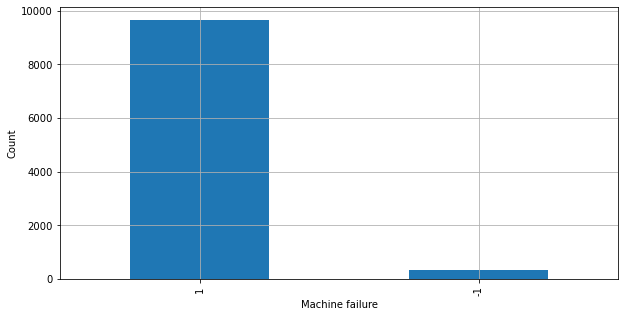

In [5]:
#Plotting a graph to visualize the amount of anomalies
plt.figure(figsize=(10,5))
class_distribution = df1['Machine failure'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Machine failure')
plt.ylabel('Count')

plt.grid()
plt.show()

In [6]:
# Load the data. Orignal data set has been processed (downsampled) to facilitate your data analysis. Anomaly label has been given. Only numerical attributes are used in this data set
print('\n data size: (%d, %d)\n' % df1.shape)

# Specifying features and target attribute
X1 = df1.drop(['Machine failure'], axis='columns')
scaler = preprocessing.MinMaxScaler()
X_df1 = X1.values
X_scaled1 = scaler.fit_transform(X_df1)
X1 = X_scaled1

y1 = df1['Machine failure'].values

# Anomaly rate. Assuming that the target attribute has '1' for normal instances, and '-1' for anomalies
print('\n Anomaly rate: %f \n' % (-1.0*(y1-1).sum()/2.0/X1.shape[0]))



 data size: (10000, 6)


 Anomaly rate: 0.033900 



The anomaly rate for this dataset is 0.0339, which is quite low. This means, the quality of this dataset is good.

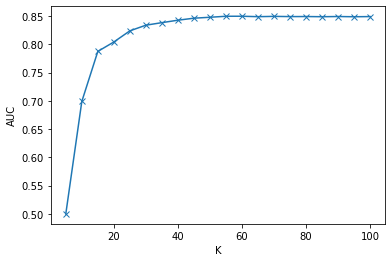

In [7]:
# Trying different values of k ('n_neighbors' parameter) for LOF to identify a good one. Plotting the relationship for k changing from 5 to 50 with 5 as the step.

auc_scores = []
for i in range(1, 101, 5):
    detector_lof = LocalOutlierFactor(n_neighbors=i, novelty=True)
    detector_lof.fit(X1)
    y1_score = detector_lof.decision_function(X1)
    auc = roc_auc_score(y1, y1_score)
    auc_scores.append(auc)

# Plot the relationship between auc and k
plt.plot(range(5, 101, 5), auc_scores, marker='x')
plt.xlabel('K')
plt.ylabel('AUC')
plt.show()

AUC score is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.
The higher the AUC score, the better the model.
For a perfect model, AUC score is 1.

Here, the AUC score is around 0.85 when K=50, and it does not change much after that. K=50 is a good value for this model.

In [8]:
# Creating the LOF model. Note here we need to set 'novelty' parameter as 'True' to get LOF scores
detector_lof = LocalOutlierFactor(n_neighbors=50, novelty=True)

# Training the model (Compute the LOF scores)
detector_lof.fit(X1)

# Obtaining anomaly score (Note that this is not the yes/no prediction as we don't know the threshold)
y1_score = detector_lof.decision_function(X1)
print(y1_score)

[0.49283003 0.50462741 0.47937414 ... 0.48838367 0.51187645 0.50559998]


LOF compares the density of any given data point to the density of its neighbors. Higher LOF indicates the data to be an outlier. Here, the values of y1_score determines the locations of the data points.

In [9]:
# Evaluating using AUC (Area Under Curve)
auc = roc_auc_score(y1, y1_score)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.850114



In [10]:
# Predicting the Yes/No label. 
y1_pred = detector_lof.predict(X1)
auc = roc_auc_score(y1, y1_pred)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.537624



Evaluation value of this model is comparatively better than the prediction value. For getting a better model, different values of parameters should be considered.

In [ ]:
# Trying different sample size ('max_samples' parameter) for iforest to identify a good one. Plotting the relationship for the size from 2**5 to 2**14 with an exponential step 2**i.

auc_scores = []
sample_sizes = []
for i in range(5, 55):
    sample_sizes.append(2**i)
    detector_if = IsolationForest(max_samples=2**i)
    detector_if.fit(X1)
    y1_score = detector_if.decision_function(X1)
    auc = roc_auc_score(y1, y1_score)
    auc_scores.append(auc)

# Plotting the relationship between auc and sample size
plt.plot(sample_sizes, auc_scores, marker='x')
plt.xscale('log')
plt.xlabel('Sample size (log)')
plt.ylabel('AUC')
plt.show()

Creating an isolation forest model for the dataset. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the maximum and minimum values of the selected feature

In [ ]:
# Creating the iForest model
detector_if = IsolationForest()

# Training the model
detector_if.fit(X1)

# Obtaining anomaly score (Note that this is not the yes/no prediction as we don't know the threshold)
y1_score = detector_if.decision_function(X1)
print(y1_score)

In [ ]:
# Evaluate using AUC (Area Under Curve)
auc = roc_auc_score(y1, y1_score)
print('\n AUC score: %f\n' % auc)

In [ ]:
# Predict the Yes/No label. The algorithm set a default threshold. But note that this is really data-dependent
y1_pred = detector_if.predict(X1)
print('\n AUC score: %f\n' % roc_auc_score(y1, y1_pred))

Isolation Forest model provides a comparatively better value than the LOF model. 